#Data Preprocessing(or Data Preparation) and Signal Processing

#Mounting Google Drive


In [1]:
#Mounting => Before your computer can use any kind of storage device (such as hard drive, Google drive), you or your operating system must make it
#accessible through the computer’s file system. This process is called mounting. You can only access files on mounted media.
#In Computers, to mount is to make a group of files in a file system structure accessible to a user or user group. In some usages, it means to make a
#device physically accessible. Mounting a file system (Google drive) attaches that Google drive to a directory (mount  point) and makes it available to the
#system. In simple words, with mounting a Google drive, user and operating system can access to all the files present in the Google drive. A mounted disk 
#(a mounted drive) is available to the operating system as a file system, for reading, writing, or both. 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing the required libraries

In [2]:
#os module in python provides functions for interacting with the operating system. os module in Python provides functions for creating and removing a 
#directory(folder), fetching its contents, os module used for changing and identifying the current directory, etc. Basically os modules allows source code
#to communicate (interact) with operating system.
#numpy module allows us to work with numerical data. numpy provides an object called numpy array. numpy supports large multi-dimensional arrays & matrices. 
#Basically numpy is a python library used for working with arrays. numpy used for arithmetic operations, statistical operations, bitwise operations, copying 
#and viewing arrays, stacking, matrix operations, linear algebra, mathematical operations, searching, sorting, and counting.
#pywt library used to perform wavelet transform (both Continuous Wavelet Transform (CWT) and Discrete Wavelet Transform (DWT). This pywt library is a 
#package of various wavelets of CWT and DWT (pywt library contains different wavelets of CWT and DWT) to perform wavelet transform.
#pandas library is used for data manipulation and data analysis. pandas module works with the tabular data (i.e. data in rows and columns). Pandas provide a
#2D table object called dataframe. pandas module offers data structures and operations for manipulating numerical tables and time series.
#Pickle in Python is primarily used in serializing and deserializing a Python object structure. In other words, it's the process of converting a python
#object into a byte stream to store it in a file/database. Basically pickle library is used to dump (store) all the files of a directory (folder) into 
#single combined pkz file (pickle file) for easy fetching of data.
#Matplotlib is the most popular plotting(=sketching, drawing, designing, outlining) library for Python. python library = Collection of modules 
#(modules = python files). Pyplot is a Matplotlib module which provides a MATLAB-like interface. Each pyplot function makes some change to a figure. For
#example, creates a figure, creates a plotting area in a figure, plots some lines in a plotting area,  decorates the plot with labels, etc. The various plots
#we can utilize using Pyplot are Line Plot, Histogram, Scatter, 3D Plot, Image, Contour, and Polar. Can also import as  "import matplotlib.pyplot as plt"  
import os
import numpy as np
import pywt
import pandas as pd
import pickle as pkl
from matplotlib import pyplot as plt

#Required Variables

In [3]:
#DATA_POINTS_PER_FILE => Data points present in each file. In the dataset in every directory (folder), each file contains 2560 data points. Therefore we
#created a variable DATA_POINTS_PER_FILE and assigned that variable with 2560
#TIME_PER_REC => Time recorded for each vibration signal. we store each vibration recording time in TIME_PER_REC. In the dataset, every 10 seconds, 1
#vibration recording of 0.1 seconds is collected. That means for every 10 seconds, one vibration (both horizontal and vertical) is recorded for 0.1 seconds
#Therefore we created a variable TIME_PER_REC and assigned that variable with 0.1
#SAMPLING_FREQ => Sampling frequency or sampling rate defines the number of samples (data points) per second. vibration sample frequency is 25.6 KHz => for 1
#second we get 25600 data points. each 10 seconds one vibration recording of 0.1s is collected => therefore 25600 * 0.1 (i.e. 2560) data points in each file
#for example, Bearing1_1 set has total 2803 files, each file with 2560 data points => 2803*2560=7175680 total data points
#The sampling period (or) sampling interval is the time difference between two consecutive(= successive, pakkana pakkana, subsequent) samples. It is the 
#inverse of the sampling frequency. For example: if the sampling frequency is 25600 Hz, the sampling period is 1/25600 = 0.000039 seconds (that means the 
#samples are spaced approximately 39 microseconds apart (=away, aside, distant, far))
#We are using morlet wavelet in our code. Therefore we created a variable called WAVELET_TYPE and assigned ‘morl’ to the variable. morl => indicates morlet 
#wavelet. assigning morl to the variable, means assigning morlet wavelet and morlet wavelet operations and functionalities to that variable.
#created VAL_SPLIT varaible to store the percentage of data split(= divide, separate) into validation data from training data.
#since we assigned, 0.1 to the VAL_SPLIT variable, we are separating 10% data from training data (total training data) and made it as validation data
#initialize(=activate, start) random seed to generate(=produce, create) same random(=not fixed) values every time
#The random module is a built-in module in python to generate the pseudo random values. random module uses random generator algorithm to generate pseudo 
#random values. Pseudo randm values are the computer-generated random values which appear to be random, but actually deterministic(=opposite of randomness,
#fixed, pre-planned, pre-determined)
#seed() function in random module provide seeds(=inputs, random inputs) to the random generator algorithm. And this random generator algorithm generate pseudo
#random value outputs.
#here, (1234) is the random input we have given
#numpy.random.seed() function => https://www.sharpsightlabs.com/blog/numpy-random-seed/ 
DATA_POINTS_PER_FILE = 2560
TIME_PER_REC = 0.1
SAMPLING_FREQ = 25600 # 25.6 KHz
SAMPLING_PERIOD = 1.0/SAMPLING_FREQ

WIN_SIZE = 20

WAVELET_TYPE = 'morl'
  
VAL_SPLIT = 0.1
 
np.random.seed(1234)

#Helper Functions
Data Normalization, Signal Processing

In [4]:
# load data frame from pickle file
#using def keyword, defined(=created) a function named load_df and passed pkz_file as an argument to the function
#with keyword => automatically releases memory after allocation. Whenever we open the file with open() function, it allocates some resources and memory to the 
#file. And we should use close() function to release or delete that memory from the file otherwise errors will come. Sometimes we forget to close() the file 
#and we couldn’t find that we didn’t closed the file, so even the whole code is correct we might get errors and we may not be able to correct it. So it’s better 
#to use “with” keyword along with open() function as “with” keyword automatically releases or deletes memory after process completion
#The open() function opens a file in text format by default. To open a file in binary format, add 'b' to the mode parameter. Hence the "rb" mode opens the file 
#in binary format for reading, while the "wb" mode opens the file in binary format for writing. (Note: there are 2 basic mode parameters (r = read mode,
#w = write mode)). Unlike text files, binary files are not human-readable.
#as = The as keyword is used to create an alias (= aka, also known as, also called). In the code, we create an alias f when opening the pkz_file, and 
#now we can refer to the pkz_file (or we can access the pkz_file) by using f instead of pkz_file.
#df => Dataframe, Basically The pickle(.pkz) file is created using Python pickle and the dump() method and is loaded (=started, activated) using Python pickle 
#and the load() method. we imported(=send) pickle module as pkl in the code. Therefore pkl.dump() is used to create pickle(.pkz) file and pkl.load() is 
#used to load(=start, activate) pickle file. Here, f is the pickle file.
#return keyword = The return keyword is used to exit (= come out from) a function and return a value.   
def load_df(pkz_file):
    with open(pkz_file, 'rb') as f:
        df=pkl.load(f)
    return df

In [5]:
# get range of values from data frame given file index
#Range of values = values present between a lower limit (inclusive) and an upper limit (exclusive).
#with def keyword, created a function called df_row_ind_to_data_range() function and passed an argument called ind
#DATA_POINTS_PER_FILE = 2560, if ind = 0, then the function df_row_ind_to_data_range(ind) returns a range of values (from 0 to 2560). if ind = 1, then
#the function df_row_ind_to_data_range(ind) returns a range of values (from 2560 to 5120) and so on.
def df_row_ind_to_data_range(ind):
    return (DATA_POINTS_PER_FILE*ind, DATA_POINTS_PER_FILE*(ind+1))

In [6]:
# perform continuous wavelet transform (CWT) on 1D signals and return 2D feature image (Extracting 2D image features)
# basically, here we are doing signal processing and data normalization. signal processing and feature extraction can be used interchangeably.
# signal processing is one of the sub-concepts of Data Preprocessing
# Data Preprocessing is required for cleaning and organizing the raw data to make it suitable for building and training machine learning models.
# Basically, it is the process of converting raw data so that we can run it through machine learning algorithms to make predictions. 
# Data Preprocessing also called as Data preparation
# Data Preprocessing includes Data Filtering(= Data Filtering is the process of choosing a smaller part of your data set and using that subset for viewing 
# viewing or analysis. Filtering is generally(but not always) temporary(= lasting only a short while, short-term, non-permanent, provisional)- the complete
# data set is kept, but only part of it is used for the calculation), Data Ordering or Data Sorting(= Data Ordering is the process of arranging data into
# into meaningful order so that we can analyze it more effectively(=successfully, completely). if data is text data arrange that data into alphabetical order
# or if data is numeric data arrange that data into numerical order.), Data Editing(= Data Editing is the process of detecting(= discovering, recognizing) and
# correcting(= rectifying, reviewing, fixing, adjusting) errors(logical inconsistencies) in data, Noise Modelling, Signal Processing, Feature Extraction, 
# (Signal Processing and Feature Extraction are little similar, the words Signal Processing and Feature Extraction can be used interchangeably), 
# Data Normalization => https://towardsdatascience.com/data-normalization-in-machine-learning-395fdec69d02 
# advanatages of Data Normalization: (1) reduce duplicate data, (2) improves accuracy
# the features extracted(=taken out) from signal processing, feature extraction are used in differentiating the healthy operation and faulty operation of a 
# machine.
def extract_feature_image(ind, feature_name='horiz accel'):
    data_range = df_row_ind_to_data_range(ind)
    data = df[feature_name].values[data_range[0]:data_range[1]]
    # use window to process(= prepare, develop) 1D signal
    data = np.array([np.mean(data[i:i+WIN_SIZE]) for i in range(0, DATA_POINTS_PER_FILE, WIN_SIZE)])
    # perform CWT on 1D data(= 1D array)
    coef, _ = pywt.cwt(data, np.linspace(1,128,128), WAVELET_TYPE)
    # transform to power and apply logarithm?!
    coef = np.log2(coef**2+0.001)
    # normalize coef
    coef = (coef - coef.min())/(coef.max() - coef.min()) 
    return coef

#Main Directory or Main Folder

In [7]:
# created main_dir variable, and assigned(= allocate, allot, set) the path where 6 bearing training datasets were saved in the pc or in the google drive.
main_dir = '/content/drive/MyDrive/Colab Notebooks/'

#Bearing1_1

In [8]:
# here, we stored bearing1_1.pkz file along with that file path in pkz_file variable
# in df variable we are calling load_df(pkz_file) function which we created(=defined) previously
# df.head() => displays 1st 5 rows of dataframe (= bearing1_1.pkz)
pkz_file = main_dir + 'bearing1_1.pkz'
df = load_df(pkz_file)
df.head()

hour  minute  second  microsecond  horiz accel  vert accel
0     9      39      39      65664.0        0.552      -0.146
1     9      39      39      65703.0        0.501      -0.480
2     9      39      39      65742.0        0.138       0.435
3     9      39      39      65781.0       -0.423       0.240
4     9      39      39      65820.0       -0.802       0.020

In [9]:
#created no_of_rows variable to store the total no. of rows present in a data frame(pickle file) (i.e. to store the no.of rows present in each file of
# pickle file.)
#df.shape[0] => return total rows(total data points in bearing1_1) of a data frame (pickle file)
#created no_of_files variable to store the total no. of files present in single combined pickle file(bearing1_1.pkz file)
#printing(=displaying) no. of rows and no. of files present in bearing1_1.pkz file.
no_of_rows = df.shape[0]
no_of_files = int(no_of_rows / DATA_POINTS_PER_FILE)
print(no_of_rows, no_of_files)

7175680 2803


#(1)signal processing = extract features

when processing(= working with, preparing) a 1D signal with CNNs, the 1D signal is usually mapped to a 2D space (i.e. a 1D signal can be converted into 2D feature maps , static feature maps , or time-frequency features). Then, these 2D features are input into the conventional 2D CNNs for further processing(=preparing, working).

here features = horiz accel feature images and vert accel feature images.


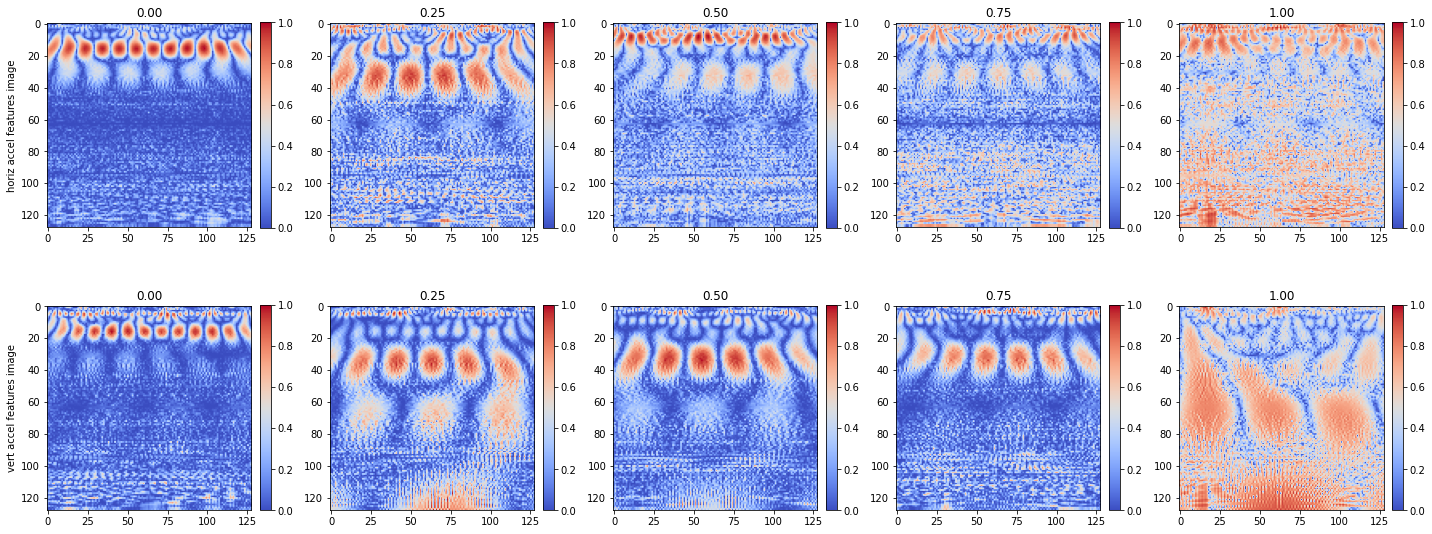

In [10]:
#plotting (= sketching, charting, blueprint, painting) diagrams 
#here, diagrams => horiz accel feature images and vert accel feature images
#both horiz accel and vert accel are vibration signals
no_of_samples=5
fig, ax = plt.subplots(2, no_of_samples, figsize=[20,8])
ax[0,0].set_ylabel('horiz accel features image')
ax[1,0].set_ylabel('vert accel features image')
#dividing the feature images into 5 samples
for i, p in enumerate(np.linspace(0,1,no_of_samples)):
    ind = int((no_of_files-1)*p)

  #extracting and plotting horizontal acceleration feature images (horiz accel feature images) for 5 samples (0.00, 0.25, 0.50, 0.75, 1.00).
  #horiz accel => horizontal acceleration vibration signal
    coef = extract_feature_image(ind, feature_name='horiz accel')
    ax[0,i].set_title('{0:.2f}'.format(p))
    im = ax[0,i].imshow(coef, cmap='coolwarm')
    fig.colorbar(im, ax=ax[0,i], fraction=0.046, pad=0.04)

  #extracting and plotting vertical acceleration feature images (vert accel feature images) for 5 samples (0.00, 0.25, 0.50, 0.75, 1.00). 
  #vert accel => vertical acceleration vibration signal
    coef = extract_feature_image(ind, feature_name='vert accel')
    ax[1,i].set_title('{0:.2f}'.format(p))
    im = ax[1,i].imshow(coef, cmap='coolwarm')
    fig.colorbar(im, ax=ax[1,i], fraction=0.046, pad=0.04)
  
#The tight_layout() function in pyplot module of matplotlib library is used to automatically adjust subplot parameters to give specified padding.
#padding = adding space (adding required white space)
plt.tight_layout()
#The show() function in pyplot module of matplotlib library is used to display all figures.
plt.show()

#extracting feature images for each data file in bearing1_1 and converting into numpy array
#storing the probability of failure  

In [11]:
#created dictionary named data with keys x and y. x key referred to an empty list. y key also referred to an empty list
#extracted(= derived, calculated, taken out)horiz accel features from file 0 to file 2802(2803 total files) and stored in coef_h
#extracted(= derived, calculated, taken out)vert accel features from file 0 to file 2802(2803 total files) and stored in coef_v
#created x_ variable to store the array(numpy array) of list of horiz accel feature values and vert accel feature values from file 0 to file 2802 (2803 total
#files)
#created y_ variable to store the probability(=chance, likelihood, possibility, anticipation, expectation) of failure. Probability as a number lies between
#(0 and 1). A probability of 0 means that the event will not happen. Here, event is the failure. Hence if y_ variable value is 0, then that means there is
#no machine failure, machine is working properly, if y_ variable is 1, then that means there is machine failure (complete machine breakdown). Since our data
#is run-to-failure data, first there will be no failure at all (i.e. 0) and eventually the machine will fail over time (i.e. 1). According to our code, 
#0 => means no failure , 1 => means complete failure, >0.5 => means some failure. y_ variable stores the values like this => 0/2802, 1/2802,
#2/2802,--------2802/2802
#using append method added x_ variable values to the end of data dictionary with x key (i.e. data['x']). In data dictionary, x key represents an empty list
#therefore values of x_ variable added at the end of x empty list.
#using append method added y_ variable values to the end of data dictionary with y key (i.e. data['y']). In data dictionary, y key represents an empty list
#therefore values of y_ variable added at the end of y empty list.
#after appending, in data['x'] we stored the array of data['x'] values, in data['y'] we stored the array of data['y'] values. Therefore, data['x'] becomes
#an numpy array and data['y'] becomes an numpy array.
#array = collection of similar types of values
#with assert keyword, if the condition returns true, then nothing happens. (or) If the condition returns true, then that condition will be displayed 
#or printed as it is.If the condition returns false, then an AssertionError is raised. The keyword assert functionality is somewhat similar to if condition.
#shape => https://www.w3schools.com/python/numpy/numpy_array_shape.asp
#Here, no_of_files = 2803 (bearing1_1 contains total 2803 files), 2 = represents no. of rows 
#128, 128 = represents pixels (i.e. 128 x 128 pixels) Pixel => short form for picture element
#since the above condition is true, we printed no_of_files, shape of data['x'], and shape of data['y']
#data['x'].shape gives = no. of files, no. of rows(here, 1st row represents horix accel feature images, 2nd row represents vert accel feature images), and
#each feature image size (i,e. no. of pixels(128 x 128)) as an ouptut.
#data['y'].shape gives = no. of files as an output.
#shape in python displays output in tuple format.
#The shape of an array is the number of elements in each dimension.
#data['x'] array contains 4 dimensions, and data['y'] array contains 1 dimension.
#basically, computer stores an image in 0's and 1's.
#128 x 128 pixels => represents that each feature image is divided into 128 small parts(i.e. each image is represented as 128 rows and 128 columnns with
#0's and 1's)

data = {'x': [], 'y': []}
for i in range(0, no_of_files):
    coef_h = extract_feature_image(i, feature_name='horiz accel')
    coef_v = extract_feature_image(i, feature_name='vert accel')
    x_ = np.array([coef_h, coef_v])
    y_ = i/(no_of_files-1)
    data['x'].append(x_)
    data['y'].append(y_)
data['x']=np.array(data['x'])
data['y']=np.array(data['y'])

assert data['x'].shape==(no_of_files, 2, 128, 128)
print(no_of_files, data['x'].shape, data['y'].shape)

2803 (2803, 2, 128, 128) (2803,)


#(2) Splitting into train data and validation data

In [12]:
#Splitting (= dividing, separating, breaking up) data (total 2803 files) into training data and validation data.
#training data is the set of data used to train (=teach) the model. Validation data is the set of data that is separated from training data to validate 
#(= check, monitor) the model. Test data is the set of data used to test the model in terms of accuracy after the model has been already trained and validated.
#validation data is used to check or validate the model whether the model is working correctly or not on the data which the model is not trained. If the
#model works correctly, then our model is used to predict, if the model doesn’t works correctly, then the model is not used to predict.
#training data and validation data are not similar because validation data is the set of data separated from training data.
#One of the major reasons we need a validation data set is to ensure (=make sure) that our model is not overfitting to the data in the training data set.
#overfitting means = that our machine learning model becomes really good at being able to classify (= analyze, study, examine and determine) the data in the 
#training data set, but it’s unable (= not able) to understand and make accurate classifications (= analysis, study) on data that it wasn’t trained on, so
#during training, if we are also validating the model on our validation data set and see that the results it’s giving for the validation data set is just as 
#good as the results it’s giving for the training data, then we can be more confident that our model is not overfitting, on the other hand if the results on 
#the training data are really good but the results on the validation data is lagging behind (= not good) then our model is likely (=may be, probably) 
#overfitting. 
#basically, overfitting means = when the model performs too well and make accurate predictions on the training data, and if the same model does not performs 
#well and does not make correct predictions on the data that model wasn’t trained (example : test data, validation data), then that model is said to have 
#overfitting.
#created no_of_val variable to store the validation data files, here we separated 10% of the data from training data and made it as validation data, hence 
#VAL_SPLIT variable value is 0.1, there are total 2803 no_of_files in bearing1_1. the int() function converts the specified value into an integer number.
#permutation = randomly changing the arrangement of data. Created perm variable and stored the data files by applying permutation.(i.e. stored the data
#files in random order)
#Created val_data variable to store validation data or validation data set. Here, we separated 10% data from training data (i.e. 280 data files from 2803 total 
#data files) and converted that 10% data into validation data.
#Created train_data variable to store training data or training data set. With 10% data excluded (validation data excluded) remaining 90% data is the training 
#data. (i.e. 2523 data files) (2803 total data files).
#Print no. of validation data files, shape of val_dat['x'] , and shape of val_data['y']  
#Print no. of train data files, shape of train_data['x'], and shape of train_data['y']   
no_of_val = int(VAL_SPLIT*no_of_files)
perm = np.random.permutation(no_of_files)
val_data = {'x': data['x'][perm[0:no_of_val]], 'y': data['y'][perm[0:no_of_val]]}
train_data = {'x': data['x'][perm[no_of_val: ]], 'y': data['y'][perm[no_of_val: ]]}

print(no_of_val, val_data['x'].shape, val_data['y'].shape)
print(no_of_files-no_of_val, train_data['x'].shape, train_data['y'].shape)

280 (280, 2, 128, 128) (280,)
2523 (2523, 2, 128, 128) (2523,)


#(3)Saving as pickle files(.pkz files)

In [13]:
#saving val_data of bearing1_1 as pickle(.pkz) file.
#The pickle(.pkz) file is created using Python pickle and the dump() method and is loaded (=started, activated) using Python pickle and the load() method.
#we imported(=send) pickle module as pkl in the code. Therefore pkl.dump() is used to create pickle(.pkz) file and pkl.load() is used to load(=start, activate) 
#pickle file.
#pickle.dump() function => is used to store the object data(dump information) to the file. pickle.dump() function takes 3 arguments. The first argument is the
#object that you want to store. The second argument is the file object you get by opening the desired file in write-binary (wb) mode. third argument is 
#optional.
#created out_file variable to store the validation data of bearing1_1 as pickle(.pkz) file. file name => bearing1_1_val_data.pkz
#main_dir variable => path where 6 bearing training datasets were saved in the pc or in the google drive.
#with keyword => automatically releases memory after allocation. Whenever we open the file with open() function, it allocates some resources and memory to the 
#file. And we should use close() function to release or delete that memory from the file otherwise errors will come. Sometimes we forget to close() the file
#and we couldn’t find that we didn’t closed the file, so even the whole code is correct we might get errors and we may not be able to correct it. So it’s better
#to use “with” keyword along with open() function as “with” keyword automatically releases or deletes memory after process completion.
#The open() function opens a file in text format by default. To open a file in binary format, add 'b' to the mode parameter. Hence the "wb" mode opens the file 
#in binary format for writing. Unlike text files, binary files are not human-readable.
#as = The as keyword is used to create an alias (= aka, also known as, also called). In the above example, we create an alias f when opening the pkz_file, and 
#now we can refer to the pkz_file (or we can access the pkz_file) by using f instead of pkz_file.
#pkl.dump() creates file object named "f" and dumps(=stores) the data of val_data into "f" and saves "f" as bearing1_1_val_data.pkz in selected path 
#(google drive)  
out_file = main_dir + 'bearing1_1_val_data.pkz'
with open(out_file, 'wb') as f:
    pkl.dump(val_data, f)

#saving train_data of bearing1_1 as pickle(.pkz) file.
#opens the out_file in binary format for writing. and out_file will be renamed as f.
#pkl.dump() creates file object named "f" and dumps(=stores) the data of train_data into "f" and saves "f" as bearing1_1_train_data.pkz in selected path
#(google drive)
out_file = main_dir + 'bearing1_1_train_data.pkz'
with open(out_file, 'wb') as f:
    pkl.dump(train_data, f)

#Bearing1_2
Implementation is same as Bearing1_1

(1) Signal Processing = Extract Features

(2) Split into train data and validation data

(3) Save as pickle(.pkz) files




In [14]:
pkz_file = main_dir + 'bearing1_2.pkz'
df = load_df(pkz_file)
df.head()

hour  minute  second  microsecond  horiz accel  vert accel
0     8      47       5     196910.0        0.050      -0.253
1     8      47       5     196950.0        0.165      -0.140
2     8      47       5     196990.0        0.125       0.542
3     8      47       5     197030.0        0.157      -0.261
4     8      47       5     197070.0        0.421       0.081

In [15]:
no_of_rows = df.shape[0]
no_of_files = int(no_of_rows / DATA_POINTS_PER_FILE)
print(no_of_rows, no_of_files)

2229760 871


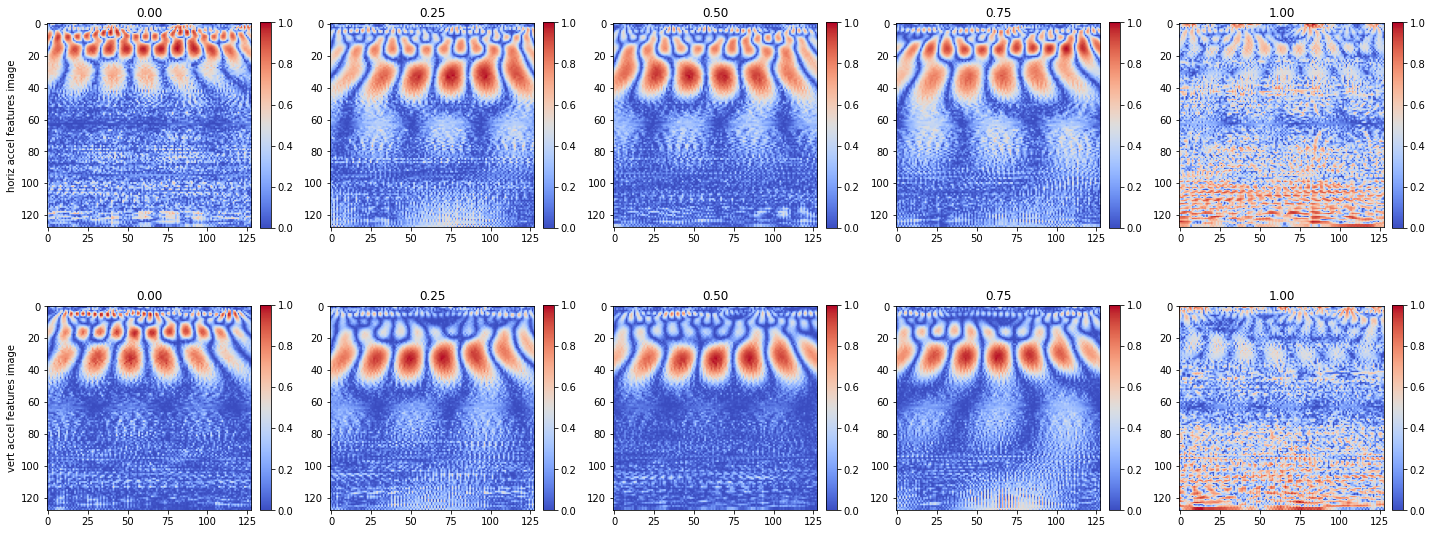

In [16]:
no_of_samples=5
fig, ax = plt.subplots(2, no_of_samples, figsize=[20,8])
ax[0,0].set_ylabel('horiz accel features image')
ax[1,0].set_ylabel('vert accel features image')

for i, p in enumerate(np.linspace(0,1,no_of_samples)):
    ind = int((no_of_files-1)*p)

    coef = extract_feature_image(ind, feature_name='horiz accel')
    ax[0,i].set_title('{0:.2f}'.format(p))
    im = ax[0,i].imshow(coef, cmap='coolwarm')
    fig.colorbar(im, ax=ax[0,i], fraction=0.046, pad=0.04)

    coef = extract_feature_image(ind, feature_name='vert accel')
    ax[1,i].set_title('{0:.2f}'.format(p))
    im = ax[1,i].imshow(coef, cmap='coolwarm')
    fig.colorbar(im, ax=ax[1,i], fraction=0.046, pad=0.04)

plt.tight_layout()

plt.show()

In [17]:
data = {'x': [], 'y': []}
for i in range(0, no_of_files):
    coef_h = extract_feature_image(i, feature_name='horiz accel')
    coef_v = extract_feature_image(i, feature_name='vert accel')
    x_ = np.array([coef_h, coef_v])
    y_ = i/(no_of_files-1)
    data['x'].append(x_)
    data['y'].append(y_)
data['x']=np.array(data['x'])
data['y']=np.array(data['y'])

assert data['x'].shape==(no_of_files, 2, 128, 128)
print(no_of_files, data['x'].shape, data['y'].shape)

871 (871, 2, 128, 128) (871,)


In [18]:
no_of_val = int(VAL_SPLIT*no_of_files)
perm = np.random.permutation(no_of_files)
val_data = {'x': data['x'][perm[0:no_of_val]], 'y': data['y'][perm[0:no_of_val]]}
train_data = {'x': data['x'][perm[no_of_val: ]], 'y': data['y'][perm[no_of_val: ]]}

print(no_of_val, val_data['x'].shape, val_data['y'].shape)
print(no_of_files-no_of_val, train_data['x'].shape, train_data['y'].shape)

87 (87, 2, 128, 128) (87,)
784 (784, 2, 128, 128) (784,)


In [19]:
out_file = main_dir + 'bearing1_2_val_data.pkz'
with open(out_file, 'wb') as f:
    pkl.dump(val_data, f)


out_file = main_dir + 'bearing1_2_train_data.pkz'
with open(out_file, 'wb') as f:
    pkl.dump(train_data, f)

#Bearing2_1
Implementation is same as Bearing1_1 and Bearing1_2

(1) Signal Processing = Extract Features

(2) Split into train data and validation data

(3) Save as pickle(.pkz) files

In [20]:
pkz_file = main_dir + 'bearing2_1.pkz'
df = load_df(pkz_file)
df.head()

hour  minute  second  microsecond  horiz accel  vert accel
0     8      14      15     884410.0       -0.391       0.011
1     8      14      15     884450.0        0.292       0.133
2     8      14      15     884490.0        0.596       0.024
3     8      14      15     884530.0        0.230       0.272
4     8      14      15     884570.0       -0.225       0.272

In [21]:
no_of_rows = df.shape[0]
no_of_files = int(no_of_rows / DATA_POINTS_PER_FILE)
print(no_of_rows, no_of_files)

2332160 911


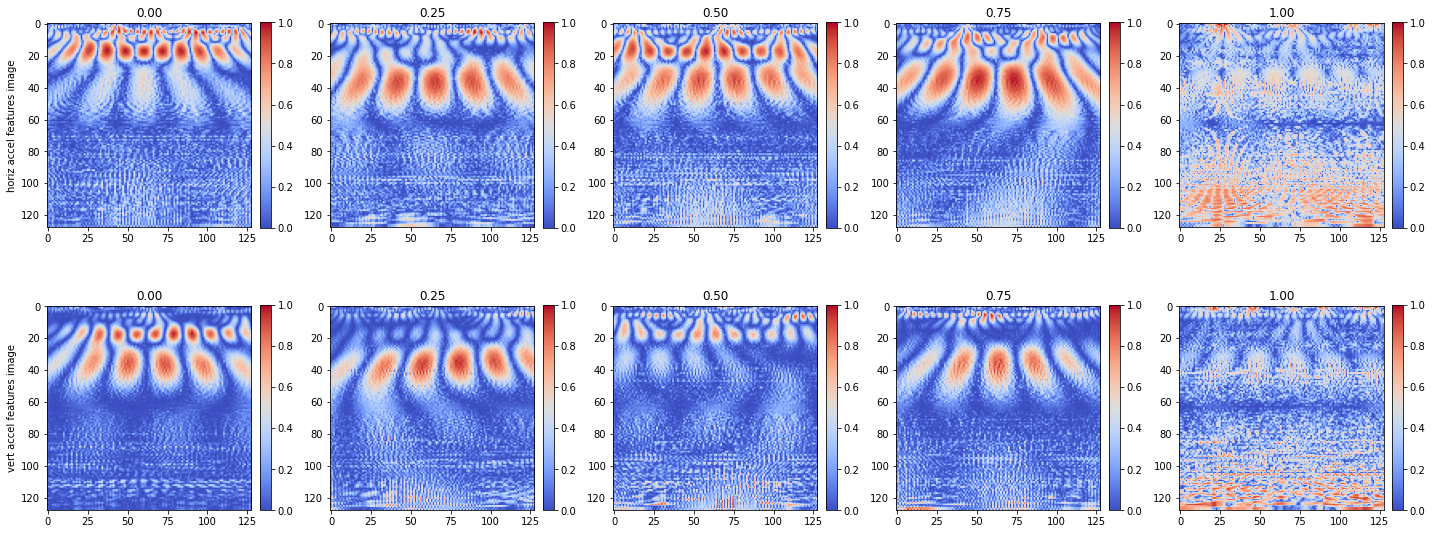

In [22]:
no_of_samples=5
fig, ax = plt.subplots(2, no_of_samples, figsize=[20,8])
ax[0,0].set_ylabel('horiz accel features image')
ax[1,0].set_ylabel('vert accel features image')

for i, p in enumerate(np.linspace(0,1,no_of_samples)):
    ind = int((no_of_files-1)*p)

    coef = extract_feature_image(ind, feature_name='horiz accel')
    ax[0,i].set_title('{0:.2f}'.format(p))
    im = ax[0,i].imshow(coef, cmap='coolwarm')
    fig.colorbar(im, ax=ax[0,i], fraction=0.046, pad=0.04)

    coef = extract_feature_image(ind, feature_name='vert accel')
    ax[1,i].set_title('{0:.2f}'.format(p))
    im = ax[1,i].imshow(coef, cmap='coolwarm')
    fig.colorbar(im, ax=ax[1,i], fraction=0.046, pad=0.04)

plt.tight_layout()

plt.show()

In [23]:
data = {'x': [], 'y': []}
for i in range(0, no_of_files):
    coef_h = extract_feature_image(i, feature_name='horiz accel')
    coef_v = extract_feature_image(i, feature_name='vert accel')
    x_ = np.array([coef_h, coef_v])
    y_ = i/(no_of_files-1)
    data['x'].append(x_)
    data['y'].append(y_)
data['x']=np.array(data['x'])
data['y']=np.array(data['y'])

assert data['x'].shape==(no_of_files, 2, 128, 128)
print(no_of_files, data['x'].shape, data['y'].shape)

911 (911, 2, 128, 128) (911,)


In [24]:
no_of_val = int(VAL_SPLIT*no_of_files)
perm = np.random.permutation(no_of_files)
val_data = {'x': data['x'][perm[0:no_of_val]], 'y': data['y'][perm[0:no_of_val]]}
train_data = {'x': data['x'][perm[no_of_val: ]], 'y': data['y'][perm[no_of_val: ]]}

print(no_of_val, val_data['x'].shape, val_data['y'].shape)
print(no_of_files-no_of_val, train_data['x'].shape, train_data['y'].shape)

91 (91, 2, 128, 128) (91,)
820 (820, 2, 128, 128) (820,)


In [25]:
out_file = main_dir + 'bearing2_1_val_data.pkz'
with open(out_file, 'wb') as f:
    pkl.dump(val_data, f)


out_file = main_dir + 'bearing2_1_train_data.pkz'
with open(out_file, 'wb') as f:
    pkl.dump(train_data, f)

#Bearing2_2

Implementation is same as Bearing1_1, Bearing1_2, and Bearing2_1

(1) Signal Processing = Extract Features

(2) Split into train data and validation data

(3) Save as pickle(.pkz) files

In [26]:
pkz_file = main_dir + 'bearing2_2.pkz'
df = load_df(pkz_file)
df.head()

hour  minute  second  microsecond  horiz accel  vert accel
0     7      40      33     540660.0        0.038       0.290
1     7      40      33     540700.0        0.125      -0.104
2     7      40      33     540740.0        0.035      -0.314
3     7      40      33     540780.0       -0.092       0.200
4     7      40      33     540820.0        0.033       0.211

In [27]:
no_of_rows = df.shape[0]
no_of_files = int(no_of_rows / DATA_POINTS_PER_FILE)
print(no_of_rows, no_of_files)

2040320 797


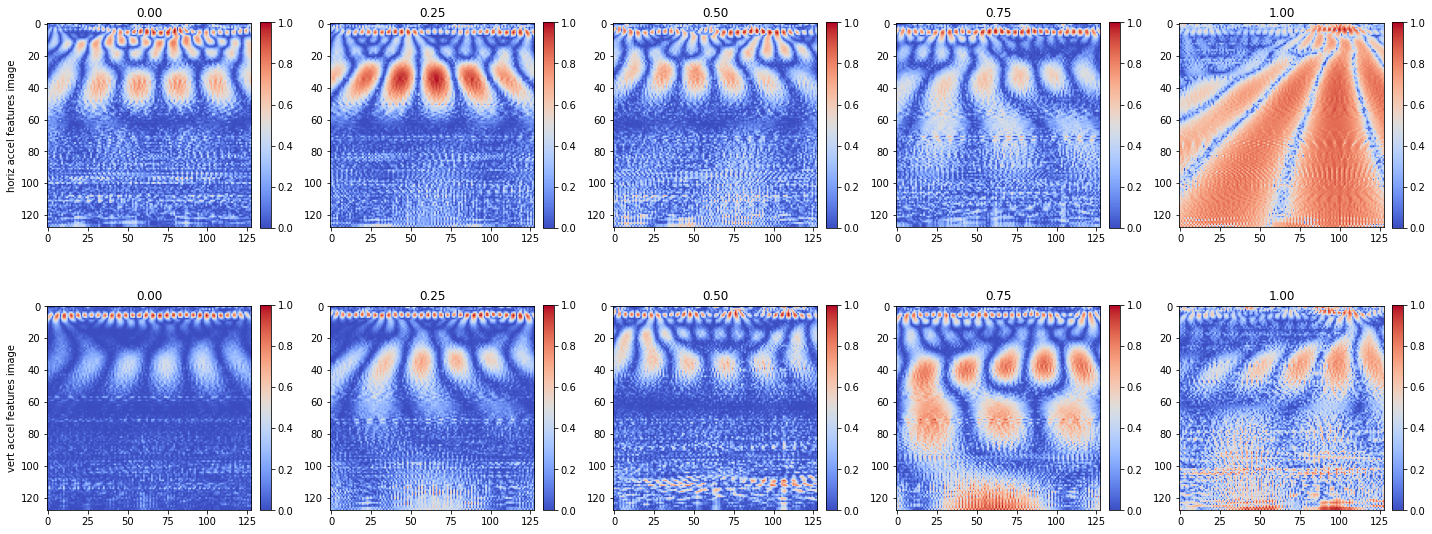

In [28]:
no_of_samples=5
fig, ax = plt.subplots(2, no_of_samples, figsize=[20,8])
ax[0,0].set_ylabel('horiz accel features image')
ax[1,0].set_ylabel('vert accel features image')

for i, p in enumerate(np.linspace(0,1,no_of_samples)):
    ind = int((no_of_files-1)*p)

    coef = extract_feature_image(ind, feature_name='horiz accel')
    ax[0,i].set_title('{0:.2f}'.format(p))
    im = ax[0,i].imshow(coef, cmap='coolwarm')
    fig.colorbar(im, ax=ax[0,i], fraction=0.046, pad=0.04)

    coef = extract_feature_image(ind, feature_name='vert accel')
    ax[1,i].set_title('{0:.2f}'.format(p))
    im = ax[1,i].imshow(coef, cmap='coolwarm')
    fig.colorbar(im, ax=ax[1,i], fraction=0.046, pad=0.04)

plt.tight_layout()

plt.show()

In [29]:
data = {'x': [], 'y': []}
for i in range(0, no_of_files):
    coef_h = extract_feature_image(i, feature_name='horiz accel')
    coef_v = extract_feature_image(i, feature_name='vert accel')
    x_ = np.array([coef_h, coef_v])
    y_ = i/(no_of_files-1)
    data['x'].append(x_)
    data['y'].append(y_)
data['x']=np.array(data['x'])
data['y']=np.array(data['y'])

assert data['x'].shape==(no_of_files, 2, 128, 128)
print(no_of_files, data['x'].shape, data['y'].shape)

797 (797, 2, 128, 128) (797,)


In [30]:
no_of_val = int(VAL_SPLIT*no_of_files)
perm = np.random.permutation(no_of_files)
val_data = {'x': data['x'][perm[0:no_of_val]], 'y': data['y'][perm[0:no_of_val]]}
train_data = {'x': data['x'][perm[no_of_val: ]], 'y': data['y'][perm[no_of_val: ]]}

print(no_of_val, val_data['x'].shape, val_data['y'].shape)
print(no_of_files-no_of_val, train_data['x'].shape, train_data['y'].shape)

79 (79, 2, 128, 128) (79,)
718 (718, 2, 128, 128) (718,)


In [31]:
out_file = main_dir + 'bearing2_2_val_data.pkz'
with open(out_file, 'wb') as f:
    pkl.dump(val_data, f)


out_file = main_dir + 'bearing2_2_train_data.pkz'
with open(out_file, 'wb') as f:
    pkl.dump(train_data, f)

#Bearing3_1

Implementation is same as Bearing1_1, Bearing1_2, Bearing2_1, and Bearing2_2

(1) Signal Processing = Extract Features

(2) Split into train data and validation data

(3) Save as pickle(.pkz) files

In [32]:
pkz_file = main_dir + 'bearing3_1.pkz'
df = load_df(pkz_file)
df.head()

hour  minute  second  microsecond  horiz accel  vert accel
0     9      10      39     118790.0        0.338      -0.263
1     9      10      39     118830.0        0.278       0.285
2     9      10      39     118870.0        0.143       0.590
3     9      10      39     118910.0        0.090      -0.193
4     9      10      39     118940.0        0.035      -0.109

In [33]:
no_of_rows = df.shape[0]
no_of_files = int(no_of_rows / DATA_POINTS_PER_FILE)
print(no_of_rows, no_of_files)

1318400 515


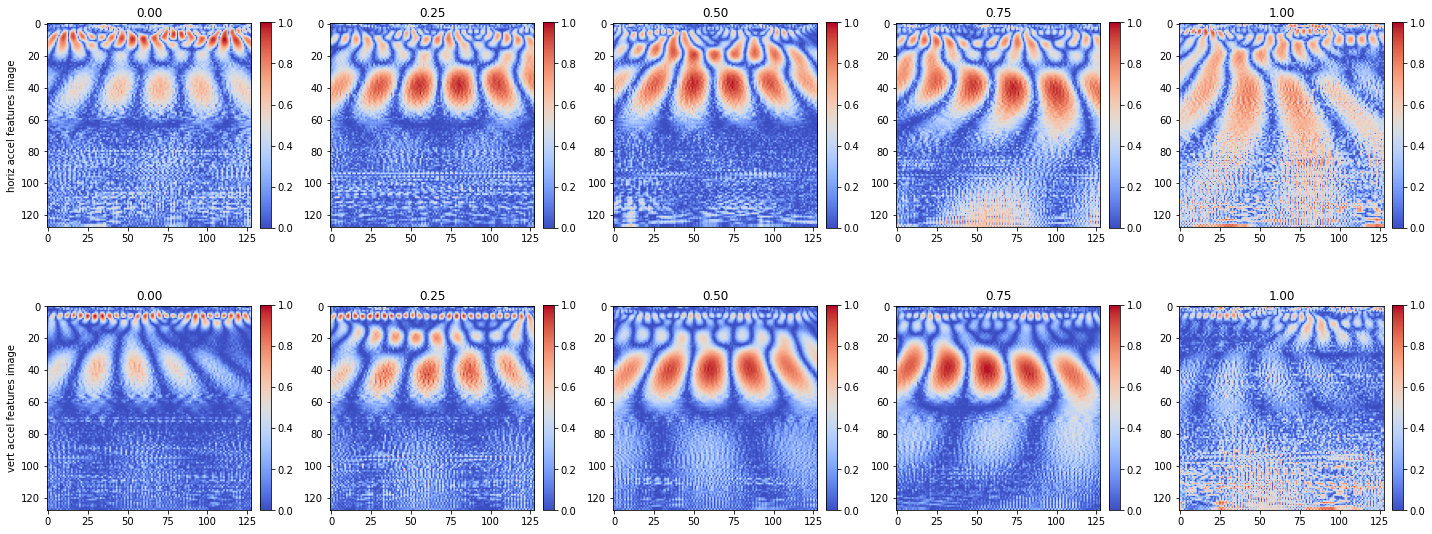

In [34]:
no_of_samples=5
fig, ax = plt.subplots(2, no_of_samples, figsize=[20,8])
ax[0,0].set_ylabel('horiz accel features image')
ax[1,0].set_ylabel('vert accel features image')

for i, p in enumerate(np.linspace(0,1,no_of_samples)):
    ind = int((no_of_files-1)*p)

    coef = extract_feature_image(ind, feature_name='horiz accel')
    ax[0,i].set_title('{0:.2f}'.format(p))
    im = ax[0,i].imshow(coef, cmap='coolwarm')
    fig.colorbar(im, ax=ax[0,i], fraction=0.046, pad=0.04)

    coef = extract_feature_image(ind, feature_name='vert accel')
    ax[1,i].set_title('{0:.2f}'.format(p))
    im = ax[1,i].imshow(coef, cmap='coolwarm')
    fig.colorbar(im, ax=ax[1,i], fraction=0.046, pad=0.04)

plt.tight_layout()

plt.show()

In [35]:
data = {'x': [], 'y': []}
for i in range(0, no_of_files):
    coef_h = extract_feature_image(i, feature_name='horiz accel')
    coef_v = extract_feature_image(i, feature_name='vert accel')
    x_ = np.array([coef_h, coef_v])
    y_ = i/(no_of_files-1)
    data['x'].append(x_)
    data['y'].append(y_)
data['x']=np.array(data['x'])
data['y']=np.array(data['y'])

assert data['x'].shape==(no_of_files, 2, 128, 128)
print(no_of_files, data['x'].shape, data['y'].shape)

515 (515, 2, 128, 128) (515,)


In [36]:
no_of_val = int(VAL_SPLIT*no_of_files)
perm = np.random.permutation(no_of_files)
val_data = {'x': data['x'][perm[0:no_of_val]], 'y': data['y'][perm[0:no_of_val]]}
train_data = {'x': data['x'][perm[no_of_val: ]], 'y': data['y'][perm[no_of_val: ]]}

print(no_of_val, val_data['x'].shape, val_data['y'].shape)
print(no_of_files-no_of_val, train_data['x'].shape, train_data['y'].shape)

51 (51, 2, 128, 128) (51,)
464 (464, 2, 128, 128) (464,)


In [37]:
out_file = main_dir + 'bearing3_1_val_data.pkz'
with open(out_file, 'wb') as f:
    pkl.dump(val_data, f)


out_file = main_dir + 'bearing3_1_train_data.pkz'
with open(out_file, 'wb') as f:
    pkl.dump(train_data, f)

#Bearing3_2

Implementation is same as Bearing1_1, Bearing1_2, Bearing2_1, Bearing2_2, and Bearing3_1

(1) Signal Processing = Extract Features

(2) Split into train data and validation data

(3) Save as pickle(.pkz) files

In [38]:
pkz_file = main_dir + 'bearing3_2.pkz'
df = load_df(pkz_file)
df.head()

hour  minute  second  microsecond  horiz accel  vert accel
0     8      34      41     978160.0       -0.291       0.181
1     8      34      41     978200.0        0.146       0.185
2     8      34      41     978240.0        0.404      -0.159
3     8      34      41     978280.0        0.191      -0.179
4     8      34      41     978320.0       -0.180       0.072

In [39]:
no_of_rows = df.shape[0]
no_of_files = int(no_of_rows / DATA_POINTS_PER_FILE)
print(no_of_rows, no_of_files)

4190720 1637


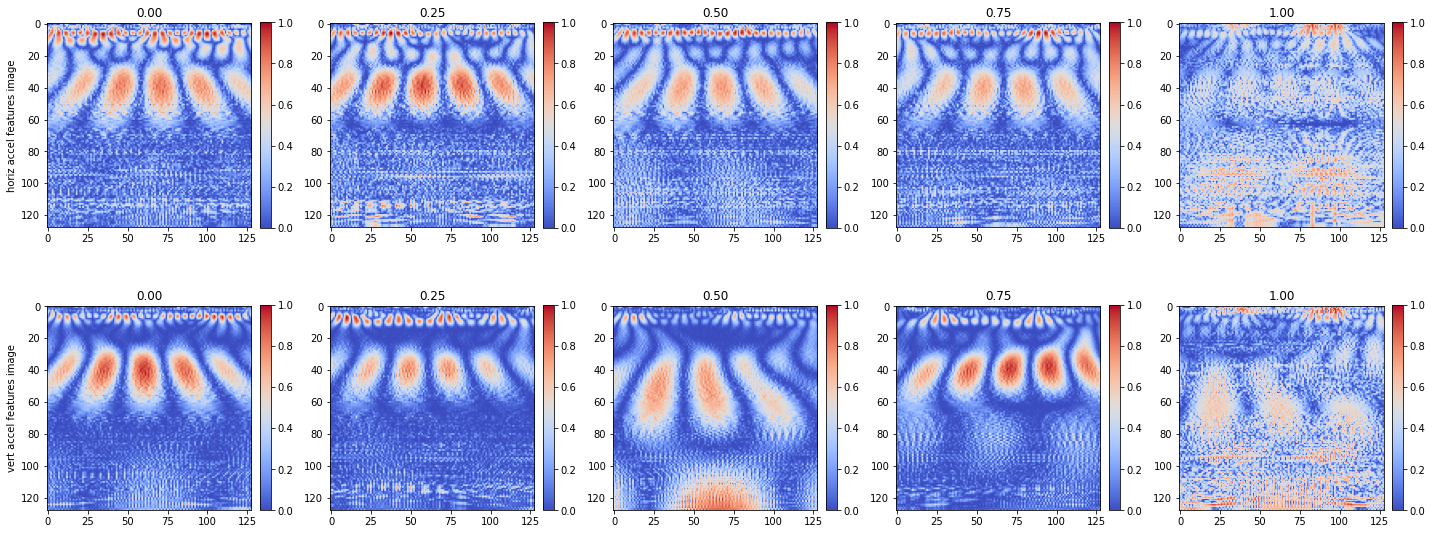

In [40]:
no_of_samples=5
fig, ax = plt.subplots(2, no_of_samples, figsize=[20,8])
ax[0,0].set_ylabel('horiz accel features image')
ax[1,0].set_ylabel('vert accel features image')

for i, p in enumerate(np.linspace(0,1,no_of_samples)):
    ind = int((no_of_files-1)*p)

    coef = extract_feature_image(ind, feature_name='horiz accel')
    ax[0,i].set_title('{0:.2f}'.format(p))
    im = ax[0,i].imshow(coef, cmap='coolwarm')
    fig.colorbar(im, ax=ax[0,i], fraction=0.046, pad=0.04)

    coef = extract_feature_image(ind, feature_name='vert accel')
    ax[1,i].set_title('{0:.2f}'.format(p))
    im = ax[1,i].imshow(coef, cmap='coolwarm')
    fig.colorbar(im, ax=ax[1,i], fraction=0.046, pad=0.04)

plt.tight_layout()

plt.show()

In [41]:
data = {'x': [], 'y': []}
for i in range(0, no_of_files):
    coef_h = extract_feature_image(i, feature_name='horiz accel')
    coef_v = extract_feature_image(i, feature_name='vert accel')
    x_ = np.array([coef_h, coef_v])
    y_ = i/(no_of_files-1)
    data['x'].append(x_)
    data['y'].append(y_)
data['x']=np.array(data['x'])
data['y']=np.array(data['y'])

assert data['x'].shape==(no_of_files, 2, 128, 128)
print(no_of_files, data['x'].shape, data['y'].shape)

1637 (1637, 2, 128, 128) (1637,)


In [42]:
no_of_val = int(VAL_SPLIT*no_of_files)
perm = np.random.permutation(no_of_files)
val_data = {'x': data['x'][perm[0:no_of_val]], 'y': data['y'][perm[0:no_of_val]]}
train_data = {'x': data['x'][perm[no_of_val: ]], 'y': data['y'][perm[no_of_val: ]]}

print(no_of_val, val_data['x'].shape, val_data['y'].shape)
print(no_of_files-no_of_val, train_data['x'].shape, train_data['y'].shape)

163 (163, 2, 128, 128) (163,)
1474 (1474, 2, 128, 128) (1474,)


In [43]:
out_file = main_dir + 'bearing3_2_val_data.pkz'
with open(out_file, 'wb') as f:
    pkl.dump(val_data, f)


out_file = main_dir + 'bearing3_2_train_data.pkz'
with open(out_file, 'wb') as f:
    pkl.dump(train_data, f)